In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
iris = load_iris()

In [3]:
#train test split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)


In [4]:
#DT MODELİ

tree_clf = DecisionTreeClassifier(criterion= "gini", max_depth = 5, random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [5]:
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print("DT Modeli doğruluğu : ",accuracy)

DT Modeli doğruluğu :  1.0


In [6]:
#Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(conf_matrix)

Confusion Matrix : 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


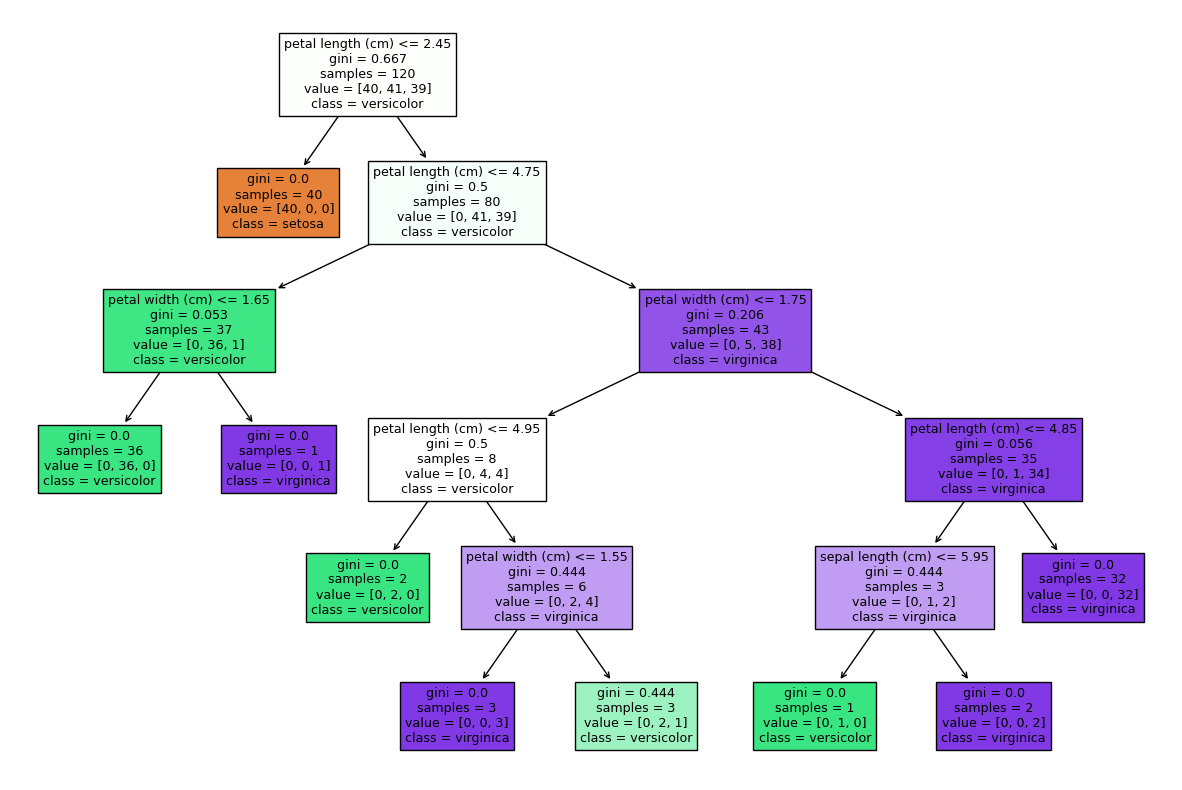

In [7]:
plt.figure(figsize = (15,10))
plot_tree(tree_clf, filled = True, feature_names = iris.feature_names,class_names = list(iris.target_names))
plt.show()

In [8]:
#Hangi özellik önemli
feature_importances = tree_clf.feature_importances_
feature_names = iris.feature_names

feature_importances_sorted = sorted(zip(feature_importances, feature_names), reverse = True)
for importance, feature_name in feature_importances_sorted:
    print(f"{feature_name}: {importance}")

petal length (cm): 0.9045522597319637
petal width (cm): 0.07849499604256478
sepal length (cm): 0.016952744225471498
sepal width (cm): 0.0


C:\Users\batuh\AppData\Local\Temp\ipykernel_16376\6558401.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0], X[idx,1], c=color, label = iris.target_names[i], cmap = plt.cm.RdYlBu,
C:\Users\batuh\AppData\Local\Temp\ipykernel_16376\6558401.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0], X[idx,1], c=color, label = iris.target_names[i], cmap = plt.cm.RdYlBu,
C:\Users\batuh\AppData\Local\Temp\ipykernel_16376\6558401.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0], X[idx,1], c=color, label = iris.target_names[i], cmap = plt.cm.RdYlBu,
C:\Users\batuh\AppData\Local\Temp\ipykernel_16376\6558401.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0], X[idx,1], c=color, label = iris.target_names[i], cmap = plt.cm.RdYlBu,


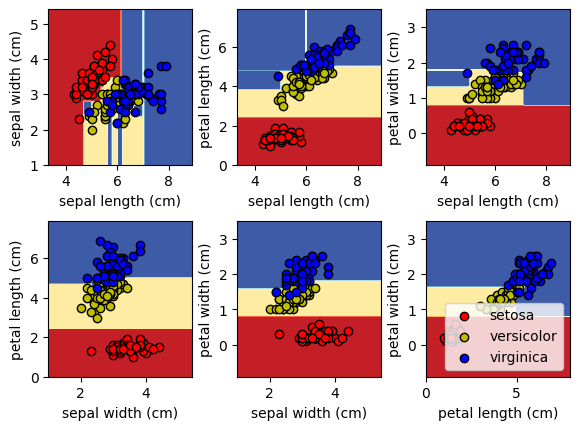

In [9]:
import numpy as np

n_classes = len(iris.target_names)
plot_colors = "ryb" 
for pairidx , pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X = iris.data[:,pair]
    y = iris.target
    clf = DecisionTreeClassifier().fit(X,y)
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
    DecisionBoundaryDisplay.from_estimator(clf, X,
                                              cmap = plt.cm.RdYlBu,
                                              response_method="predict",
                                              ax=ax,
                                              xlabel = feature_names[pair[0]],
                                              ylabel = feature_names[pair[1]])
    for i, color in zip(range(n_classes),plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx,0], X[idx,1], c=color, label = iris.target_names[i], cmap = plt.cm.RdYlBu,
                   edgecolors="black")

plt.legend()

In [11]:
#Diabetes Dataset
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()

In [16]:
X = diabetes.data
y = diabetes.target
df = pd.DataFrame(X, columns=diabetes.feature_names)
df["target"] = y
print(df.columns)


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


In [17]:
print(df.head(10))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.0

In [18]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)


In [24]:
#Decision Tree Regresyon Modeli
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

In [22]:
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("mse: ",mse)


mse:  4976.797752808989


In [27]:
rmse = np.sqrt(mse)
print("rmse : ", rmse)

rmse :  70.54642267903446


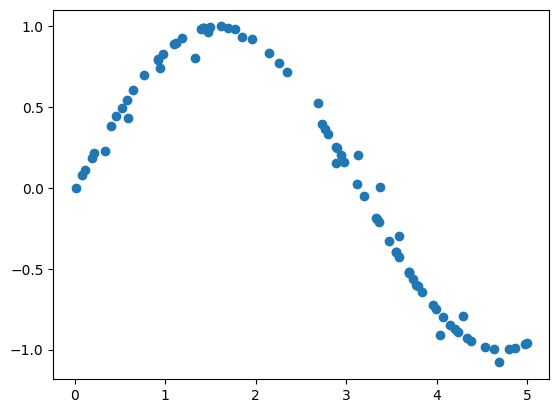

In [33]:
#Create a dataset
X = np.sort(5 * np.random.rand(80,1),axis = 0)
y = np.sin(X).ravel()

#add noise
y[::5]+= 0.5 * (0.5 - np.random.rand(16))

plt.scatter(X,y)

In [36]:
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 5)
regr_1.fit(X,y)
regr_2.fit(X,y)

X_test = np.arange(0,5,0.05)[: , np.newaxis]
y_pred_1 = regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)



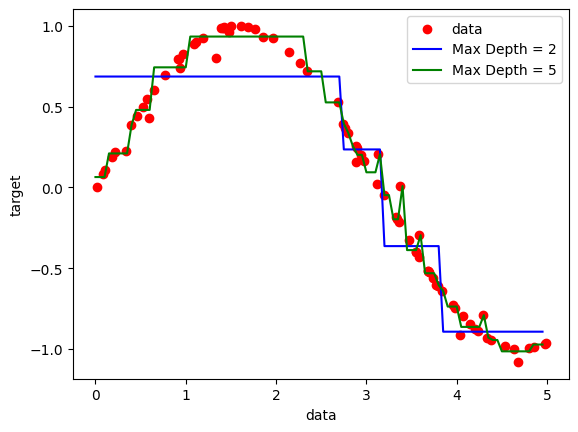

In [37]:
#Visualization

plt.figure()
plt.scatter(X,y,c = "red", label = "data")
plt.plot(X_test,y_pred_1, color = "blue",label="Max Depth = 2")
plt.plot(X_test,y_pred_2, color = "green",label="Max Depth = 5")

plt.xlabel("data")
plt.ylabel("target")
plt.legend()